In [55]:
import numpy as np
import pandas as pd

In [56]:
df_yield = pd.read_csv("yield.csv")
df_yield.shape

(56717, 12)

In [57]:
df_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [58]:
df_yield.tail()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
56712,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2012,2012,hg/ha,24420
56713,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2013,2013,hg/ha,22888
56714,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2014,2014,hg/ha,21357
56715,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2015,2015,hg/ha,19826
56716,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2016,2016,hg/ha,18294


In [59]:
#renaming value to hg/ha
df_yield = df_yield.rename(index=str, columns={"Value":"hg/ha_yiled"})
df_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,hg/ha_yiled
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [60]:
#Dropping unwanted columns
df_yield = df_yield.drop(['Year Code', 'Element Code', 'Element', 'Area Code','Domain Code','Domain','Unit', 'Item Code'],axis=1)
df_yield.head()

,Area,Item,Year,hg/ha_yiled
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000
2,Afghanistan,Maize,1963,14260
3,Afghanistan,Maize,1964,14257
4,Afghanistan,Maize,1965,14400


In [61]:
df_yield.describe()

,Year,hg/ha_yiled
count,56717.000000,56717.000000
mean,1989.669570,62094.660084
std,16.133198,67835.932856
min,1961.000000,0.000000
25%,1976.000000,15680.000000
50%,1991.000000,36744.000000
75%,2004.000000,86213.000000
max,2016.000000,1000000.000000


In [62]:
df_yield.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56717 entries, 0 to 56716
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Area         56717 non-null  object
 1   Item         56717 non-null  object
 2   Year         56717 non-null  int64 
 3   hg/ha_yiled  56717 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


Climate Data:Rainfall

In [63]:
df_rain = pd.read_csv("rainfall.csv")
df_rain.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [64]:
df_rain.tail()

,Area,Year,average_rain_fall_mm_per_year
6722,Zimbabwe,2013,657
6723,Zimbabwe,2014,657
6724,Zimbabwe,2015,657
6725,Zimbabwe,2016,657
6726,Zimbabwe,2017,657


In [65]:
df_rain = df_rain.rename(index=str, columns={" Area":'Area'})
df_rain.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [66]:
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area                           6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 210.2+ KB


In [67]:
#Converting average_rain_fall_mm_per_year from object to float
df_rain['average_rain_fall_mm_per_year'] = pd.to_numeric(df_rain['average_rain_fall_mm_per_year'],errors = 'coerce' )
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           6727 non-null   object 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 210.2+ KB


In [68]:
df_rain.isnull().sum()

Area                               0
Year                               0
average_rain_fall_mm_per_year    780
dtype: int64

In [69]:
df_rain = df_rain.dropna()

In [70]:
df_rain.describe()

,Year,average_rain_fall_mm_per_year
count,5947.000000,5947.000000
mean,2001.365899,1124.743232
std,9.526335,786.257365
min,1985.000000,51.000000
25%,1993.000000,534.000000
50%,2001.000000,1010.000000
75%,2010.000000,1651.000000
max,2017.000000,3240.000000


In [71]:
df_rain.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327.0
1,Afghanistan,1986,327.0
2,Afghanistan,1987,327.0
3,Afghanistan,1989,327.0
4,Afghanistan,1990,327.0


In [72]:
#Merging Yield and Rainfall DF
yield_df = pd.merge(df_yield, df_rain, on=['Year','Area'])
yield_df.head()

,Area,Item,Year,hg/ha_yiled,average_rain_fall_mm_per_year
0,Afghanistan,Maize,1985,16652,327.0
1,Afghanistan,Maize,1986,16875,327.0
2,Afghanistan,Maize,1987,17020,327.0
3,Afghanistan,Maize,1989,16963,327.0
4,Afghanistan,Maize,1990,17582,327.0


In [73]:
yield_df.tail()

,Area,Item,Year,hg/ha_yiled,average_rain_fall_mm_per_year
25380,Zimbabwe,Wheat,2012,24420,657.0
25381,Zimbabwe,Wheat,2013,22888,657.0
25382,Zimbabwe,Wheat,2014,21357,657.0
25383,Zimbabwe,Wheat,2015,19826,657.0
25384,Zimbabwe,Wheat,2016,18294,657.0


In [74]:
yield_df.describe()

,Year,hg/ha_yiled,average_rain_fall_mm_per_year
count,25385.000000,25385.000000,25385.000000
mean,2001.278787,68312.278353,1254.849754
std,9.143915,75213.292733,804.449430
min,1985.000000,50.000000,51.000000
25%,1994.000000,17432.000000,630.000000
50%,2001.000000,38750.000000,1150.000000
75%,2009.000000,94286.000000,1761.000000
max,2016.000000,554855.000000,3240.000000


Pesticides

In [75]:
df_pest = pd.read_csv("pesticides.csv")
df_pest.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [76]:
#Rename
df_pest = df_pest.rename(index=str, columns={"Value":"pesticides_tonnes"})
df_pest = df_pest.drop(['Element','Domain','Unit','Item'],axis=1)
df_pest.head()

,Area,Year,pesticides_tonnes
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [77]:
df_pest.describe()

,Year,pesticides_tonnes
count,4349.000000,4.349000e+03
mean,2003.138883,2.030334e+04
std,7.728044,1.177362e+05
min,1990.000000,0.000000e+00
25%,1996.000000,9.300000e+01
50%,2003.000000,1.137560e+03
75%,2010.000000,7.869000e+03
max,2016.000000,1.807000e+06


In [78]:
df_pest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               4349 non-null   object 
 1   Year               4349 non-null   int64  
 2   pesticides_tonnes  4349 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 135.9+ KB


In [79]:
#Merging
yield_df = pd.merge(yield_df, df_pest, on=['Year','Area'])
yield_df.shape

(18949, 6)

In [80]:
yield_df.head()

,Area,Item,Year,hg/ha_yiled,average_rain_fall_mm_per_year,pesticides_tonnes
0,Albania,Maize,1990,36613,1485.0,121.0
1,Albania,Maize,1991,29068,1485.0,121.0
2,Albania,Maize,1992,24876,1485.0,121.0
3,Albania,Maize,1993,24185,1485.0,121.0
4,Albania,Maize,1994,25848,1485.0,201.0


In [81]:
avg_temp = pd.read_csv("temp.csv")
avg_temp.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [82]:
avg_temp.describe()

,year,avg_temp
count,71311.000000,68764.000000
mean,1905.799007,16.183876
std,67.102099,7.592960
min,1743.000000,-14.350000
25%,1858.000000,9.750000
50%,1910.000000,16.140000
75%,1962.000000,23.762500
max,2013.000000,30.730000


In [83]:
# Rename
avg_temp = avg_temp.rename(index=str, columns={"year":"Year","country":"Area"})
avg_temp.head()

,Year,Area,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [84]:
avg_temp.isnull().sum()

Year           0
Area           0
avg_temp    2547
dtype: int64

In [85]:
yield_df = pd.merge(yield_df,avg_temp,on=['Area','Year'])
yield_df.head()

,Area,Item,Year,hg/ha_yiled,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Maize,1991,29068,1485.0,121.0,15.36
2,Albania,Maize,1992,24876,1485.0,121.0,16.06
3,Albania,Maize,1993,24185,1485.0,121.0,16.05
4,Albania,Maize,1994,25848,1485.0,201.0,16.96


In [86]:
yield_df.shape

(28242, 7)

In [87]:
yield_df.describe()

,Year,hg/ha_yiled,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [88]:
yield_df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yiled                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

Data exploration

In [89]:
yield_df.groupby('Item').count()

,Area,Year,hg/ha_yiled,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Item,,,,,,
Cassava,2045,2045,2045,2045,2045,2045
Maize,4121,4121,4121,4121,4121,4121
Plantains and others,556,556,556,556,556,556
Potatoes,4276,4276,4276,4276,4276,4276
"Rice, paddy",3388,3388,3388,3388,3388,3388
Sorghum,3039,3039,3039,3039,3039,3039
Soybeans,3223,3223,3223,3223,3223,3223
Sweet potatoes,2890,2890,2890,2890,2890,2890
Wheat,3857,3857,3857,3857,3857,3857


In [90]:
yield_df.describe()

,Year,hg/ha_yiled,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [91]:
yield_df['Area'].nunique()

101

In [92]:
yield_df = yield_df.rename(index=str, columns={"hg/ha_yiled":"hg/ha_yield"})

In [93]:
cntry = yield_df['Area'].tolist()
cntry = list(set(cntry))
cntry = str(sorted(cntry)).replace("'",'"')
print(cntry)

["Albania", "Algeria", "Angola", "Argentina", "Armenia", "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Belarus", "Belgium", "Botswana", "Brazil", "Bulgaria", "Burkina Faso", "Burundi", "Cameroon", "Canada", "Central African Republic", "Chile", "Colombia", "Croatia", "Denmark", "Dominican Republic", "Ecuador", "Egypt", "El Salvador", "Eritrea", "Estonia", "Finland", "France", "Germany", "Ghana", "Greece", "Guatemala", "Guinea", "Guyana", "Haiti", "Honduras", "Hungary", "India", "Indonesia", "Iraq", "Ireland", "Italy", "Jamaica", "Japan", "Kazakhstan", "Kenya", "Latvia", "Lebanon", "Lesotho", "Libya", "Lithuania", "Madagascar", "Malawi", "Malaysia", "Mali", "Mauritania", "Mauritius", "Mexico", "Montenegro", "Morocco", "Mozambique", "Namibia", "Nepal", "Netherlands", "New Zealand", "Nicaragua", "Niger", "Norway", "Pakistan", "Papua New Guinea", "Peru", "Poland", "Portugal", "Qatar", "Romania", "Rwanda", "Saudi Arabia", "Senegal", "Slovenia", "South Africa", "S

In [94]:
cropss = yield_df['Item'].tolist()
cropss = list(set(cropss))
cropss = str(sorted(cropss)).replace("'",'"')
print(cropss)

["Cassava", "Maize", "Plantains and others", "Potatoes", "Rice, paddy", "Sorghum", "Soybeans", "Sweet potatoes", "Wheat", "Yams"]


In [95]:
yield_df.groupby(['Item','Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

Item            Area          
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Name: hg/ha_yield, dtype: int64

Exploring columns' relationship

In [96]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

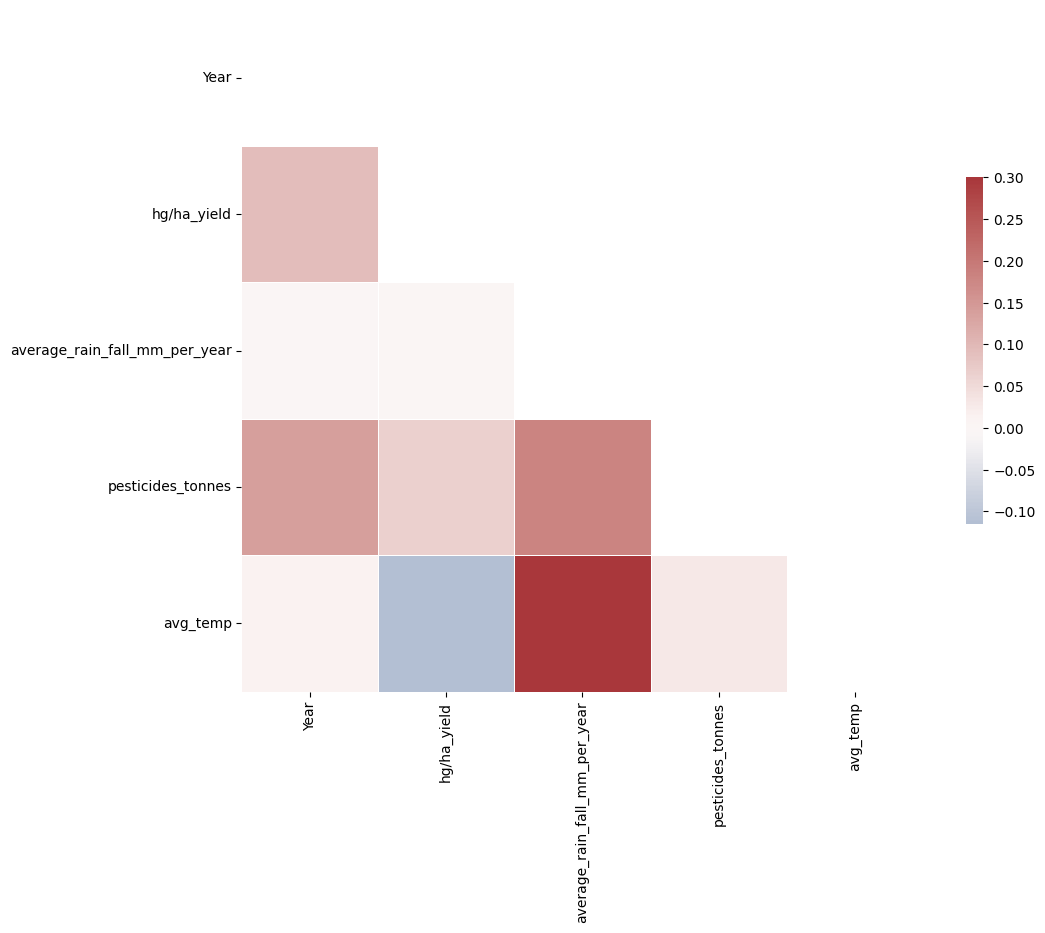

In [97]:
correlation_data = yield_df.select_dtypes(include=[np.number]).corr()
mask = np.zeros_like(correlation_data,dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.palette="vlag"
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [98]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Maize,1991,29068,1485.0,121.0,15.36
2,Albania,Maize,1992,24876,1485.0,121.0,16.06
3,Albania,Maize,1993,24185,1485.0,121.0,16.05
4,Albania,Maize,1994,25848,1485.0,201.0,16.96


Data Preprocessing

In [99]:
from sklearn.preprocessing import  OneHotEncoder

In [100]:
#One hot Encoding Area and Item for ML
yield_df_onehot = pd.get_dummies(yield_df, columns=['Area','Item'], prefix = ['Country',"Item"])
features=yield_df_onehot.loc[:,yield_df_onehot.columns != 'hg/ha_yield']
label = yield_df['hg/ha_yield']
features.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1991,1485.0,121.0,15.36,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,1992,1485.0,121.0,16.06,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,1993,1485.0,121.0,16.05,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,1994,1485.0,201.0,16.96,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [101]:
features  = features.drop(['Year'],axis=1)

In [102]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28242 entries, 0 to 28241
Columns: 114 entries, average_rain_fall_mm_per_year to Item_Yams
dtypes: bool(111), float64(3)
memory usage: 3.9+ MB


In [103]:
n_features = features.shape[1]

In [104]:
features.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1485.0,121.0,16.37,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1485.0,121.0,15.36,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,1485.0,121.0,16.06,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,1485.0,121.0,16.05,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,1485.0,201.0,16.96,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [105]:
features.to_csv("yield_features.csv", index=False)

Scaling to to bring all the features to the same level

In [106]:
from sklearn.preprocessing import  MinMaxScaler
scaler=MinMaxScaler()
features=scaler.fit_transform(features)

In [107]:
features

array([[4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 4.79045997e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.02896082e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.90028222e-01, 9.08240940e-03, 6.63713799e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 9.17806494e-03, 6.54855196e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

Trainig Data

In [108]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.2, random_state=42)

In [109]:
# Final csv 
yield_df.to_csv('yield_df.csv')

In [110]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.2, random_state=42)

In [111]:
yield_df_onehot = yield_df_onehot.drop(['Year'], axis=1)

In [112]:
yield_df_onehot.head()

,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,36613,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,29068,1485.0,121.0,15.36,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,24876,1485.0,121.0,16.06,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,24185,1485.0,121.0,16.05,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,25848,1485.0,201.0,16.96,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [113]:
test_df = pd.DataFrame(test_data,columns=yield_df_onehot.loc[:,yield_df_onehot.columns != 'hg/ha_yield'].columns)
cntry = test_df[[col for col in test_df.columns if 'Country' in col]].stack()[test_df[[col for col in test_df.columns if 'Country' in col]].stack()>0]
cntrylist = list(pd.DataFrame(cntry).index.get_level_values(1))
countries = [i.split("_")[1] for i in cntrylist]
itm = test_df[[col for col in test_df.columns if 'Item' in col]].stack()[test_df[[col for col in test_df.columns if 'Item' in col]].stack()>0]
itmlist = list(pd.DataFrame(itm).index.get_level_values(1))
items = [i.split("_")[1] for i in itmlist]

In [114]:
test_df.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,0.183443,0.090370,0.535264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.458451,0.000135,0.631005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.183443,0.132330,0.552300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.000000,0.179695,0.867802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.458451,0.000305,0.629983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [115]:
test_df.drop([col for col in test_df if 'Item' in col],axis=1, inplace=True)
test_df.drop([col for col in test_df if 'Country' in col],axis=1, inplace=True)
test_df.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0.183443,0.090370,0.535264
1,0.458451,0.000135,0.631005
2,0.183443,0.132330,0.552300
3,1.000000,0.179695,0.867802
4,0.458451,0.000305,0.629983


In [116]:
test_df['Country']=countries
test_df['Item']=items
test_df.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country,Item
0,0.183443,0.090370,0.535264,Spain,Sweet potatoes
1,0.458451,0.000135,0.631005,Madagascar,Potatoes
2,0.183443,0.132330,0.552300,Spain,Sweet potatoes
3,1.000000,0.179695,0.867802,Colombia,Soybeans
4,0.458451,0.000305,0.629983,Madagascar,"Rice, paddy"


In [117]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()
model = clf.fit(train_data,train_labels)

In [118]:
import joblib

In [119]:
joblib.dump(model, 'CYP.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [120]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

In [121]:
model_cyp = joblib.load('CYP.pkl')

In [122]:
initial_types = [('input', FloatTensorType([None, n_features]))]

In [123]:
onnx_model = convert_sklearn(model_cyp, initial_types=initial_types)

In [124]:
with open('model_cyp.onnx', 'wb') as f:
    f.write(onnx_model.SerializeToString())


In [125]:
test_df["yield_predicted"] = model.predict(test_data)
test_df["yield_actual"] = pd.DataFrame(test_labels)["hg/ha_yield"].tolist()
test_group = test_df.groupby("Item")

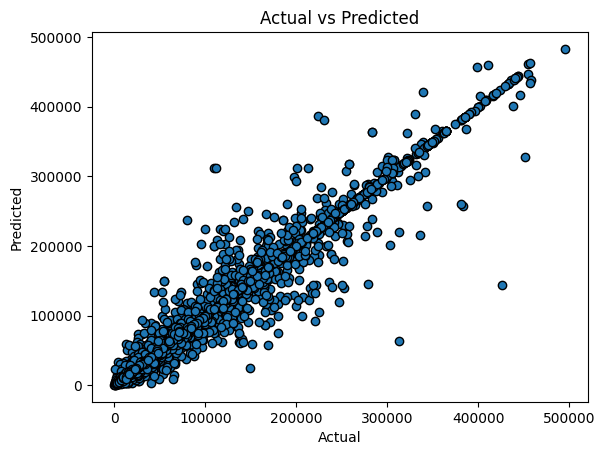

In [126]:
fig, ax = plt.subplots()

ax.scatter(test_df["yield_actual"], test_df["yield_predicted"], edgecolors=(0,0,0))

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

Model Results and Conclusions

In [127]:
varimp = {'imp':model.feature_importances_,'names':yield_df_onehot.columns[yield_df_onehot.columns != "hg/ha_yield"]}

/tmp/ipykernel_3526/3068196688.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax);


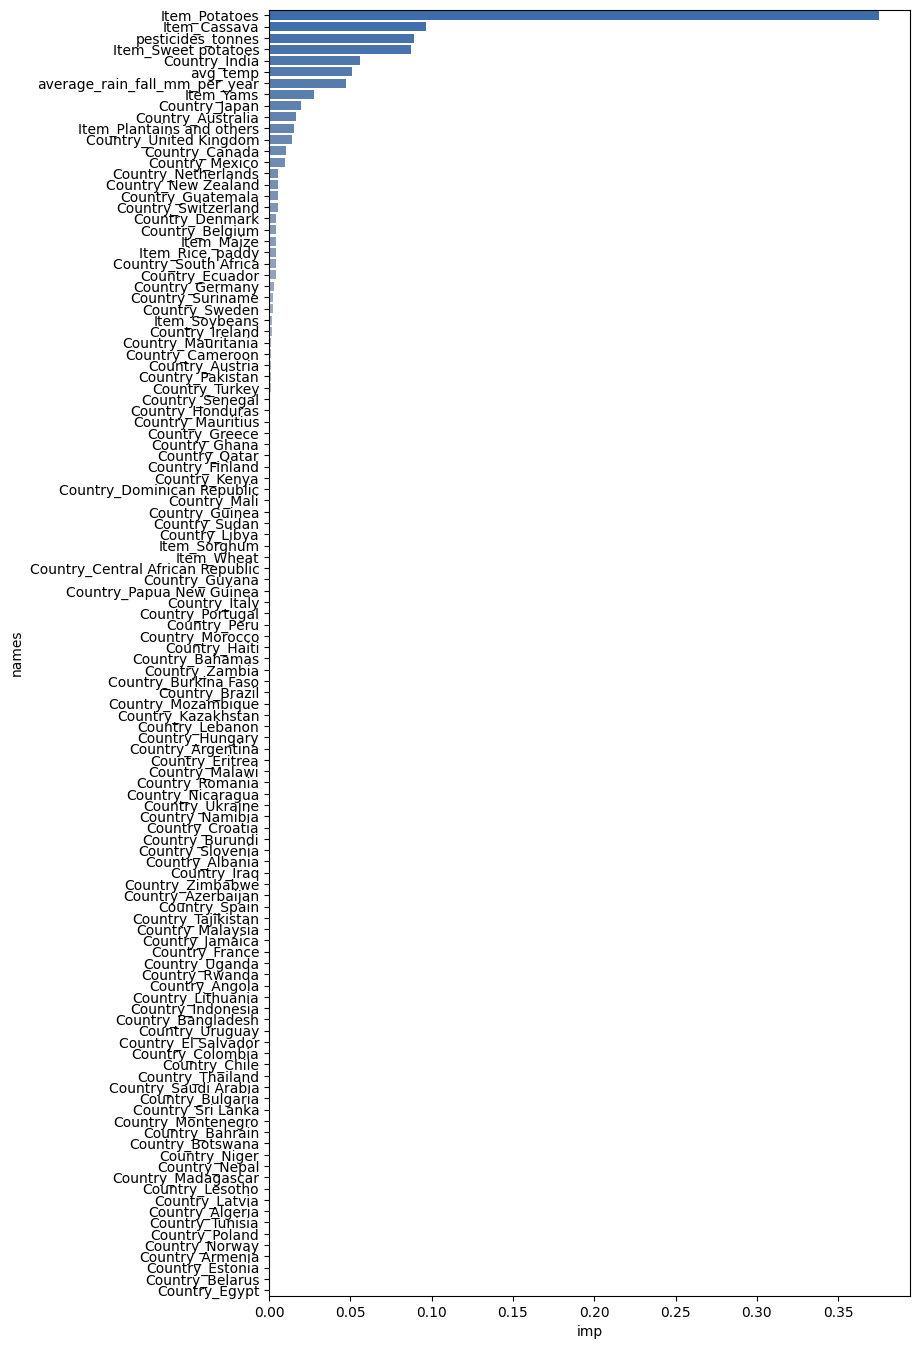

In [128]:
a4_dims = (8.27, 16.7)
fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict(varimp)
df.sort_values(ascending=False, by=["imp"], inplace=True)
df=df.dropna()
sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax);

Getting only top 7 features that effect crops

/tmp/ipykernel_3526/3365918059.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax);


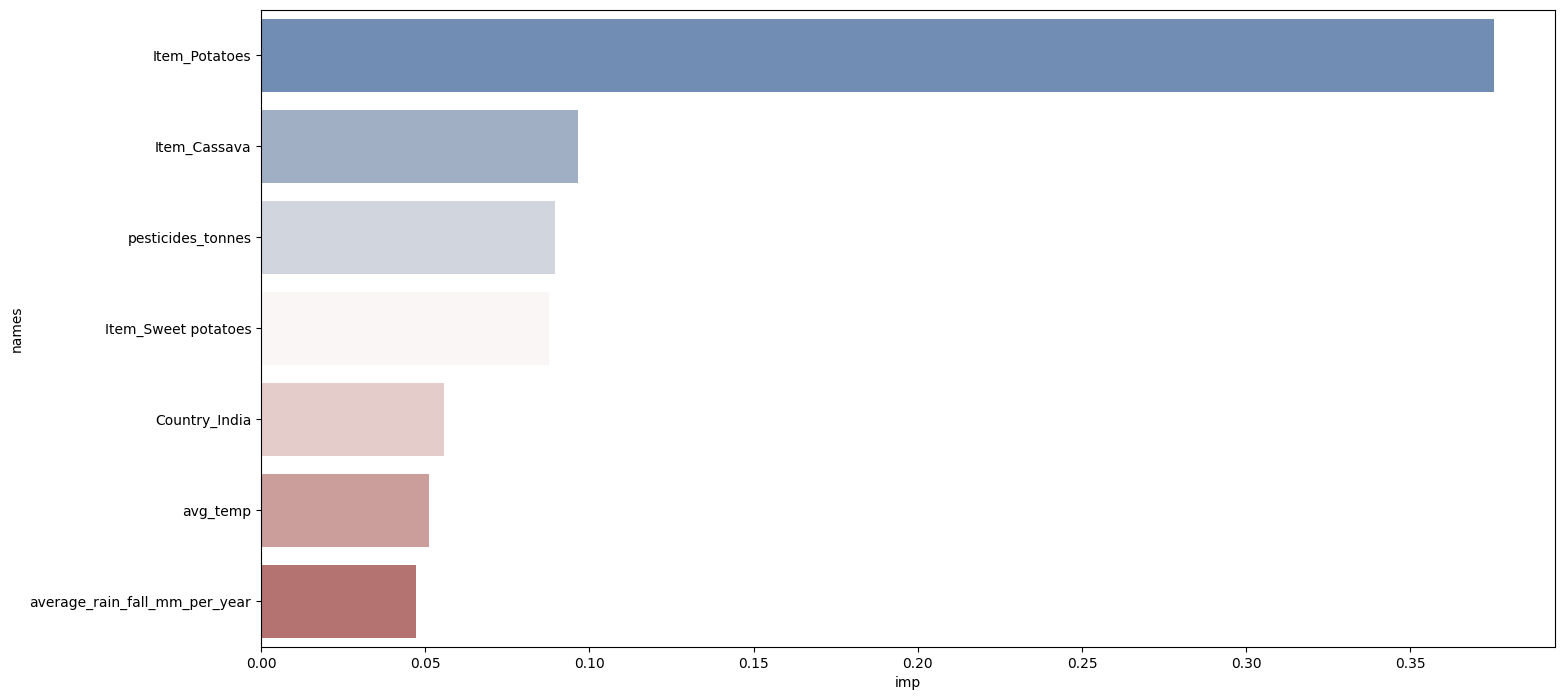

In [129]:
a4_dims = (16.7,8.27)
fig, ax = plt.subplots(figsize = a4_dims)
df=pd.DataFrame.from_dict(varimp)
df.sort_values(ascending=False,by=["imp"],inplace=True)
df=df.dropna()
df=df.nlargest(7, 'imp')
sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax);

/tmp/ipykernel_3526/991234339.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Item",y="hg/ha_yield",palette="vlag",data=yield_df,ax=ax);


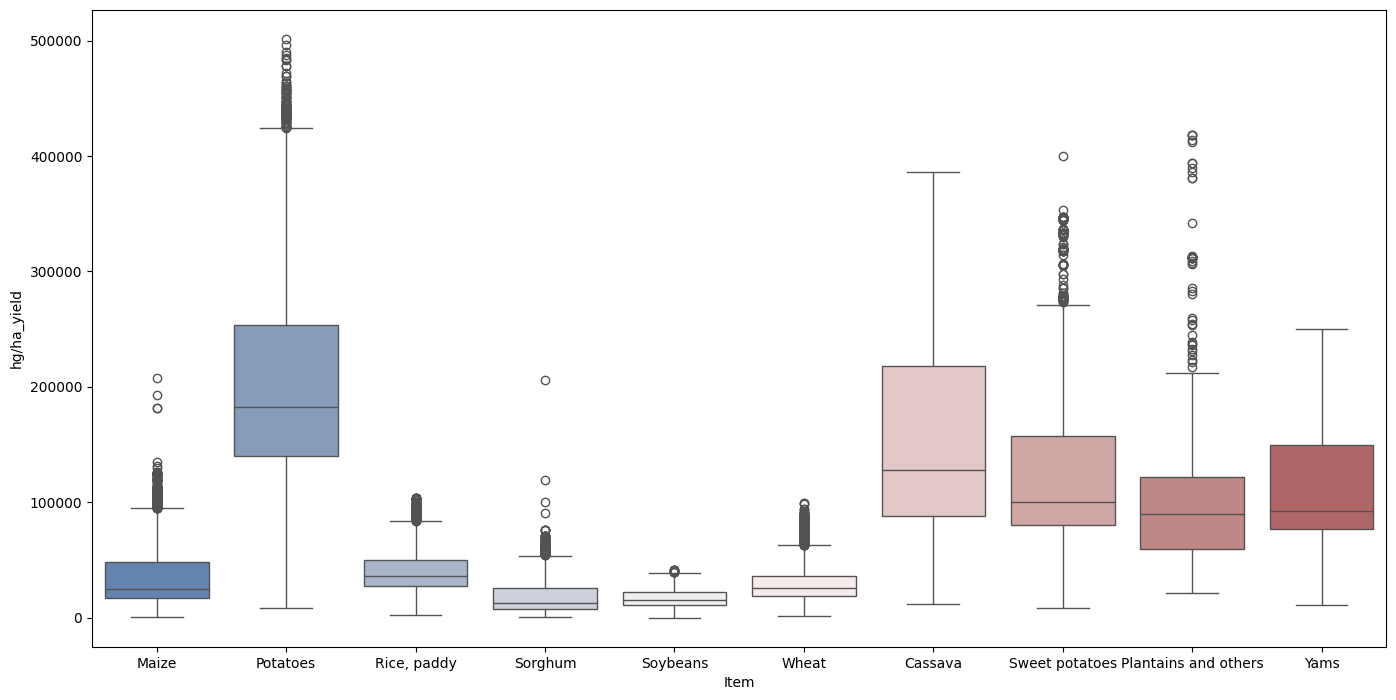

In [130]:
#Boxplot that shows yield for each item 
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="Item",y="hg/ha_yield",palette="vlag",data=yield_df,ax=ax);